# Guided Capstone Step 6 Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [2]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Fit Models with Training Data Set

**<font color='teal'> Using sklearn fit the model you cose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

## Load data

In [3]:
# load data
df=pd.read_csv('/resources/springboard/GuidedCapstone/data/step3_output.csv',index_col=False)
df.head(2)

,Unnamed: 0,Unnamed: 0.1,Name,state,summit_elev,vertical_drop,fastEight,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Cluster
0,2,2,Hilltop Ski Area,Alaska,2090,294,0.0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
1,4,4,Sunrise Park Resort,Arizona,11100,1800,0.0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


In [4]:
# index for 'Big sky'
ind_BS=df.index[df.Name=='Big Sky Resort']
ind_BS

Int64Index([171], dtype='int64')

In [5]:
# clean up index
df_name=df['Name']
df.drop(columns=['Name','state','Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df.head(2)

,summit_elev,vertical_drop,fastEight,fastQuads,quad,triple,double,surface,total_chairs,Runs,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Cluster
0,2090,294,0.0,0,0,1,0,2,3,13.0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
1,11100,1800,0.0,1,2,3,1,0,7,65.0,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


In [6]:
# remove 'summit_elev' and 'vertical_drop' columns as managers do not have handle on these
to_drop=['summit_elev','vertical_drop']
df=df.drop(to_drop,axis=1)

## Standardize the magnitude of numeric features

In [7]:
# hold out the response variables for later use
responseV=['AdultWeekend','AdultWeekday','daysOpenLastYear','projectedDaysOpen']
featureV=list(set(df.columns)-set(responseV))
df_response=df[responseV]
df_feature=df[featureV]


In [8]:
df_feature

,Runs,double,yearsOpen,fastEight,Snow Making_ac,TerrainParks,averageSnowfall,fastQuads,surface,Cluster,quad,NightSkiing_ac,SkiableTerrain_ac,LongestRun_mi,total_chairs,triple
0,13.0,0,36.0,0.0,30.0,1.0,69.0,0,2,1,0,30.0,30.0,1.0,3,1
1,65.0,1,49.0,0.0,80.0,2.0,250.0,1,0,0,2,80.0,800.0,1.2,7,3
2,10.0,3,84.0,0.0,80.0,2.0,300.0,0,1,0,0,0.0,88.0,0.4,5,1
3,33.0,1,54.0,0.0,200.0,6.0,400.0,1,2,0,1,200.0,380.0,1.0,8,3
4,67.0,5,69.0,0.0,200.0,5.0,350.0,0,4,0,1,0.0,862.0,2.0,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,48.0,1,81.0,0.0,18.0,1.0,310.0,0,1,0,0,0.0,184.0,1.0,3,1
168,32.0,1,80.0,0.0,250.0,2.0,300.0,0,0,0,1,110.0,400.0,1.0,3,1
169,33.0,3,59.0,0.0,30.0,2.0,250.0,0,1,0,0,0.0,75.0,0.7,5,1
170,25.0,0,81.0,0.0,30.0,2.0,150.0,0,0,0,0,0.0,370.0,0.4,2,2


In [9]:
df_response

,AdultWeekend,AdultWeekday,daysOpenLastYear,projectedDaysOpen
0,34.00000,30.000000,150.0,152.0
1,78.00000,74.000000,115.0,104.0
2,47.00000,47.000000,110.0,107.0
3,64.16681,49.000000,150.0,150.0
4,78.00000,78.000000,150.0,140.0
...,...,...,...,...
167,42.00000,42.000000,61.0,77.0
168,59.00000,59.000000,121.0,123.0
169,49.00000,49.000000,131.0,123.0
170,49.00000,57.916957,131.0,123.0


In [10]:
# all numeric data scaled to 0 mean and unit std
from sklearn import preprocessing

X = df_feature.values
y = df_response['AdultWeekend'].values
X_scale=preprocessing.scale(X)
y_scale=preprocessing.scale(y)

In [11]:
# split the normalized data for 'Big sky'
X_BS=X_scale[ind_BS]
y_BS=y_scale[ind_BS]

## Split into training and testing datasets

In [12]:
# 75/25 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.25, random_state=0)

#### Best Model 

In [13]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [14]:
# prediction
y_pred=lm.predict(X_test)
# R-squared value
print('r2_score for model 2: ',r2_score(y_test, y_pred))

# mean_absolute_error
print('mean_absolute_error for model 2: ',mean_absolute_error(y_test, y_pred))

print('intercept',lm.intercept_)
print('coefficient',abs(lm.coef_))

r2_score for model 2:  0.488744625472777
mean_absolute_error for model 2:  0.510384449593326
intercept -0.013832847870720245
coefficient [0.58203144 0.11871691 0.00787866 0.42976781 0.17441465 0.01383966
 0.06452459 0.22526506 0.16751758 0.2417524  0.11345911 0.01464581
 0.27657509 0.03133874 0.06326477 0.16381269]


In [15]:
X_test.shape

(43, 16)

In [16]:
# coefficiens and magnitude
df_res=pd.DataFrame()
df_res['feature']=df_feature.columns
df_res['magnitude']=abs(lm.coef_)
df_res.sort_values(by=['magnitude'],ascending=False)

,feature,magnitude
0,Runs,0.582031
3,fastEight,0.429768
12,SkiableTerrain_ac,0.276575
9,Cluster,0.241752
7,fastQuads,0.225265
4,Snow Making_ac,0.174415
8,surface,0.167518
15,triple,0.163813
1,double,0.118717
10,quad,0.113459


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [17]:
# prediction
y_BS_pred=model.predict(X_BS)
print('Big mountain predicted: ',y_BS_pred)

Big mountain predicted:  [0.46292921]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [18]:
print('Big mountain actual: ',y_BS)

Big mountain actual:  [0.46292921]


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

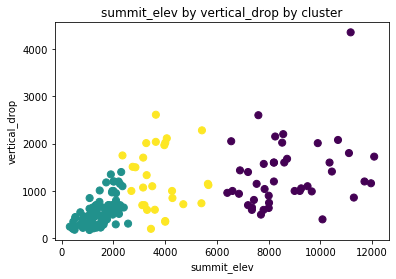

In [19]:
df=pd.read_csv('/resources/springboard/GuidedCapstone/data/step3_output.csv',index_col=False)
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['Cluster'], s=50, cmap='viridis', label ='Cluster')
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

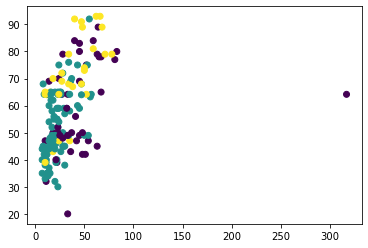

In [20]:
# plot runs vs adultweekendprice
plt.scatter(df['Runs'],df['AdultWeekend'],c=df['Cluster'])

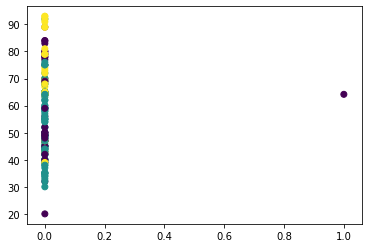

In [21]:
# plot fastEight vs adultweekendprice
plt.scatter(df['fastEight'],df['AdultWeekend'],c=df['Cluster'])

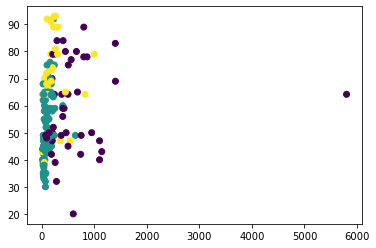

In [22]:
# plot SkiableTerrain_ac vs adultweekendprice
plt.scatter(df['SkiableTerrain_ac'],df['AdultWeekend'],c=df['Cluster'])

In [23]:
# get column locations fo top features
ind_run=df_feature.columns.get_loc("Runs")
ind_fasteight=df_feature.columns.get_loc("fastEight")
ind_SkiableTerrain_ac=df_feature.columns.get_loc("SkiableTerrain_ac")

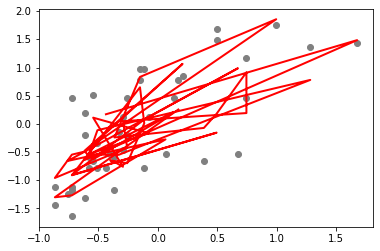

In [24]:
plt.scatter(X_test[:,ind_run], y_test,  color='gray')
plt.plot(X_test[:,ind_run], y_pred, color='red', linewidth=2)
plt.show()

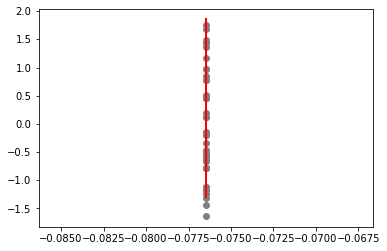

In [25]:
plt.scatter(X_test[:,ind_fasteight], y_test,  color='gray')
plt.plot(X_test[:,ind_fasteight], y_pred, color='red', linewidth=2)
plt.show()

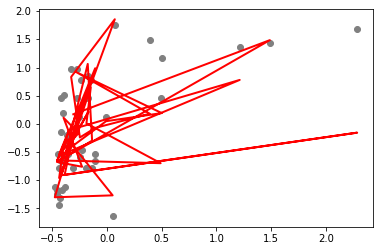

In [26]:
plt.scatter(X_test[:,ind_SkiableTerrain_ac], y_test,  color='gray')
plt.plot(X_test[:,ind_SkiableTerrain_ac], y_pred, color='red', linewidth=2)
plt.show()

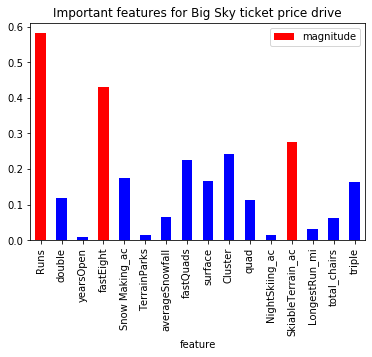

In [29]:
clrs = ['blue' if (x < .25) else 'red' for x in df_res['magnitude'] ]
df_res.plot.bar(x='feature',y='magnitude', color=clrs)
plt.title('Important features for Big Sky ticket price drive')
plt.savefig('figures/feature_magnitude.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and python scripts you have created and clean them n=up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model out a callable object using pickle for future use in a data pipeline.**<font color='teal'> Run the example code below to save out your callable model, notice we save it in the models folder we created in our previous guided capstone.</font>** 

In [292]:

#pickle.dumps(model,'/resources/springboard/GuidedCapstone/models/regression_model_adultweekend.sav')
#import joblib 

!pip install joblib
from joblib import dump, load

     |████████████████████████████████| 296kB 12.3MB/s eta 0:00:01


In [294]:
import pickle
s = pickle.dumps(model)
dump(model, '/resources/springboard/GuidedCapstone/models/regression_model_adultweekend.joblib') 

['/resources/springboard/GuidedCapstone/models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file then upload it to your github repository.</font>** 

In [304]:
r2=r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
metric_dict={'R^2 score': [r2],'Mean absolute error':[mae]}
metric_df=pd.DataFrame.from_dict(metric_dict)

In [313]:
df_res.append(metric_df,ignore_index=True)

,feature,magnitude,R^2 score,Mean absolute error
0,Runs,0.582031,NaN,NaN
1,double,0.118717,NaN,NaN
2,yearsOpen,0.007879,NaN,NaN
3,fastEight,0.429768,NaN,NaN
4,Snow Making_ac,0.174415,NaN,NaN
5,TerrainParks,0.013840,NaN,NaN
6,averageSnowfall,0.064525,NaN,NaN
7,fastQuads,0.225265,NaN,NaN
8,surface,0.167518,NaN,NaN
9,Cluster,0.241752,NaN,NaN


In [314]:
# save the dataframe as csv
df_res.to_csv('/resources/springboard/GuidedCapstone/model_coefficient_metrics.csv')